# Chapter 10: How to make predictions with a linear regression model

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the data

In [7]:
housingPath = 'housingData.csv'
housing = pd.read_csv(housingPath)

In [8]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


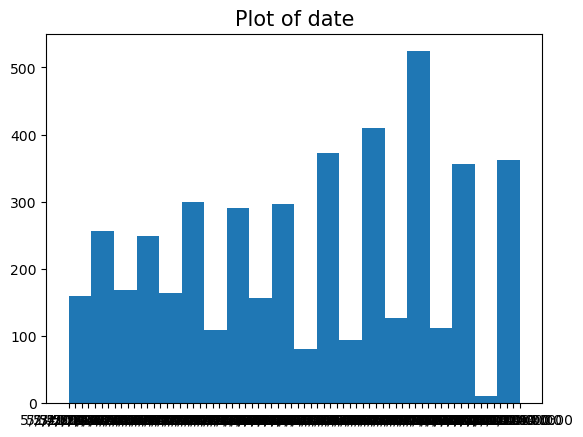

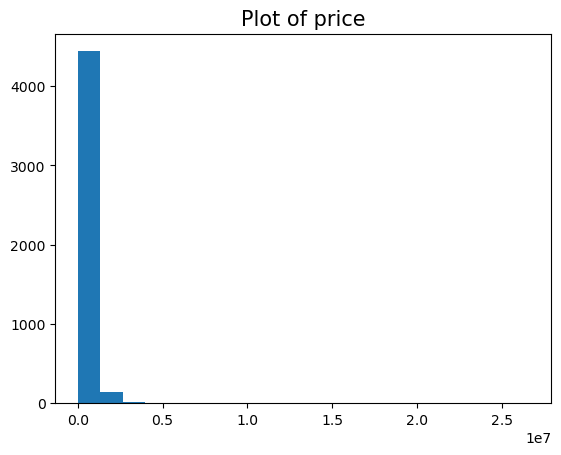

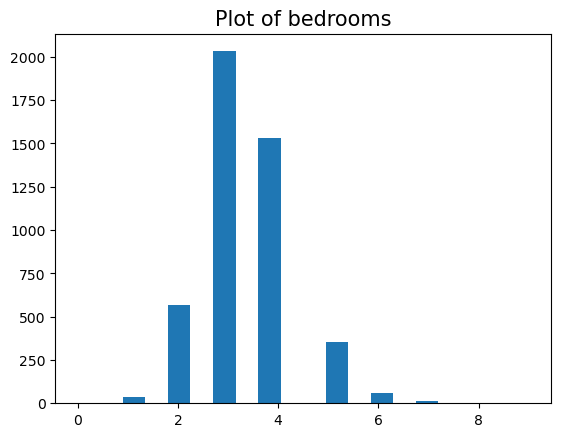

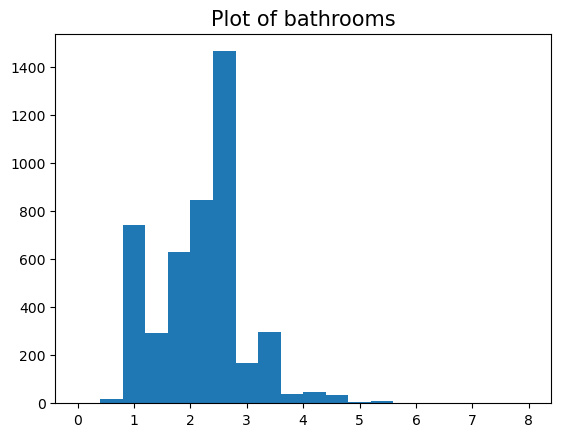

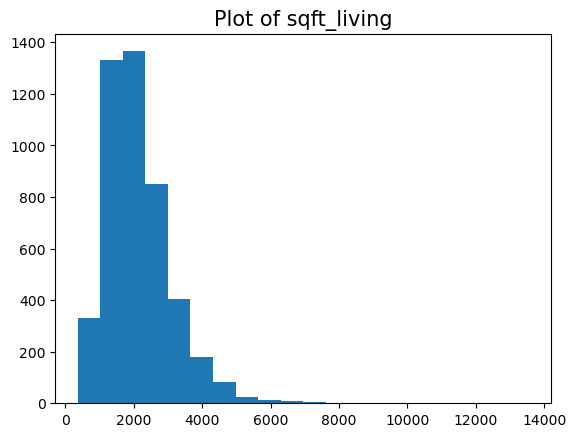

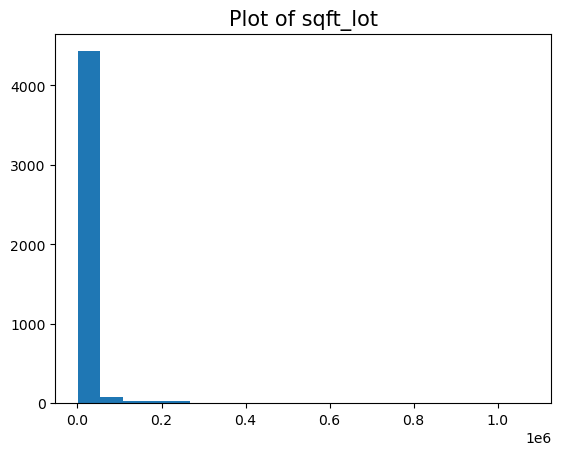

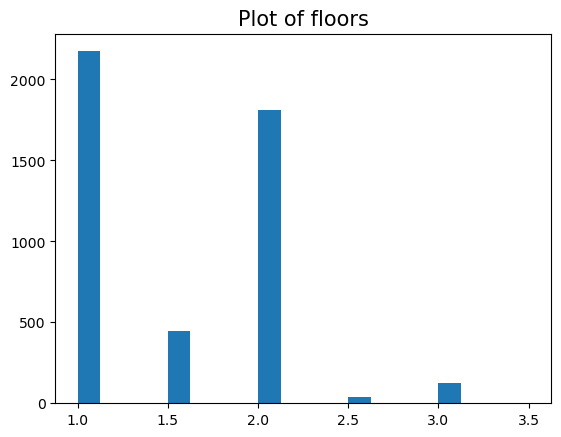

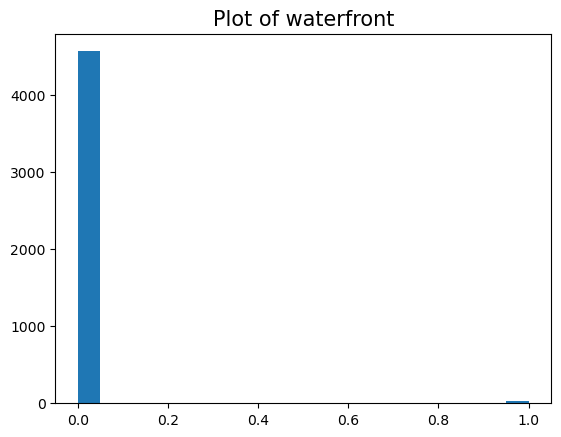

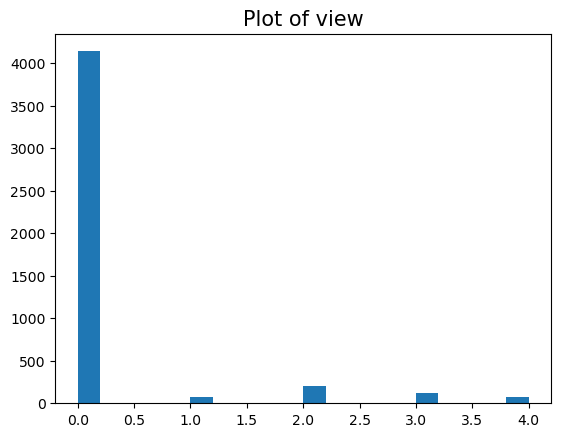

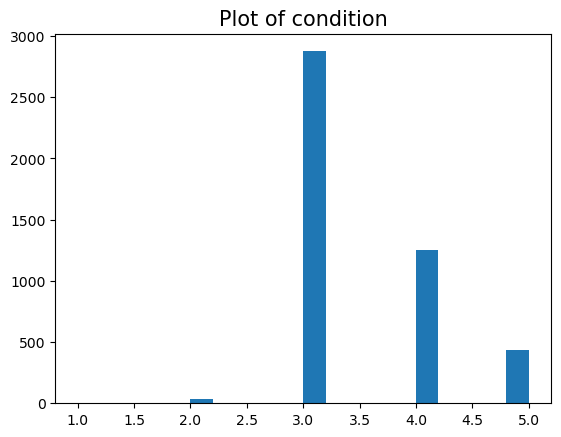

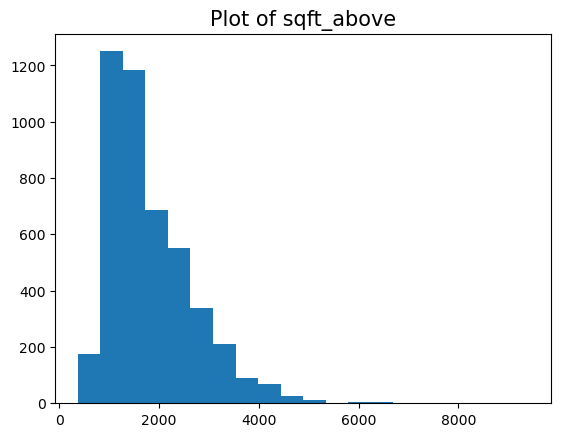

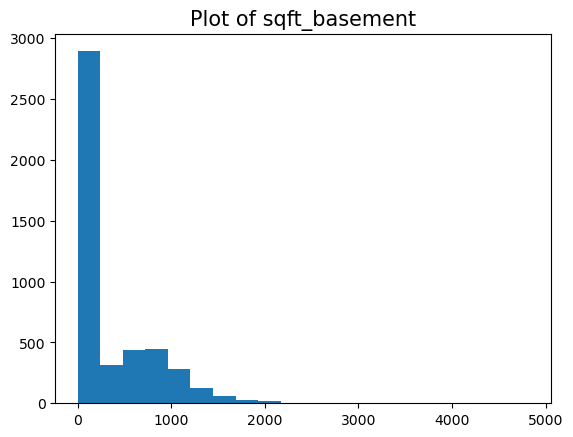

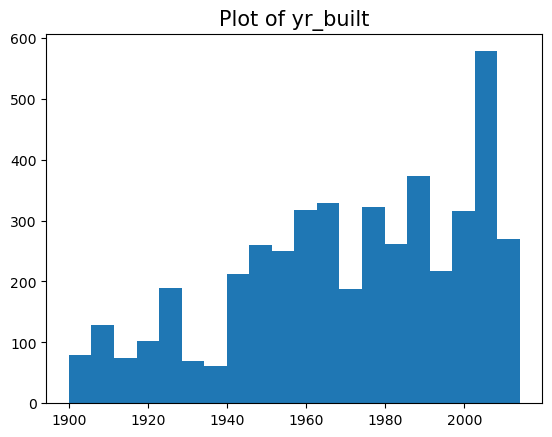

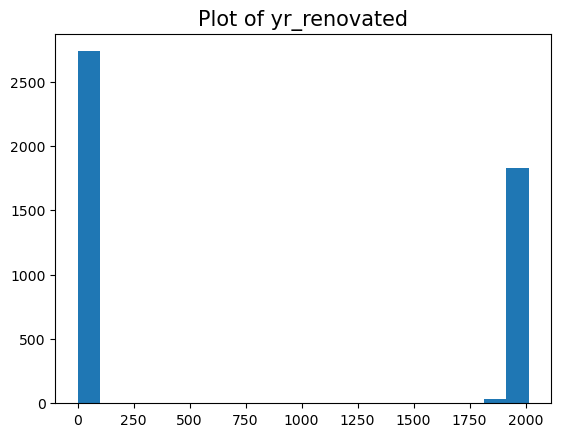

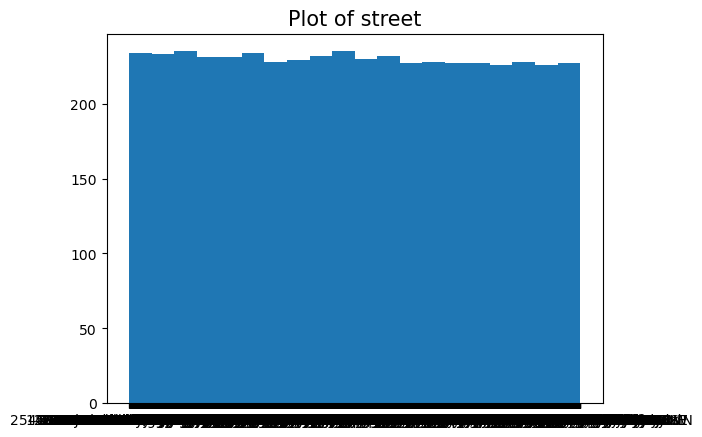

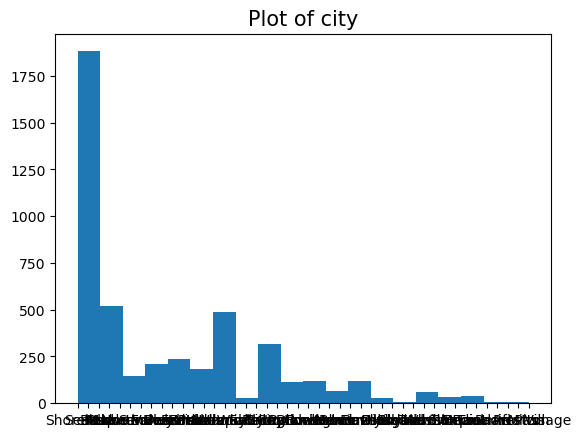

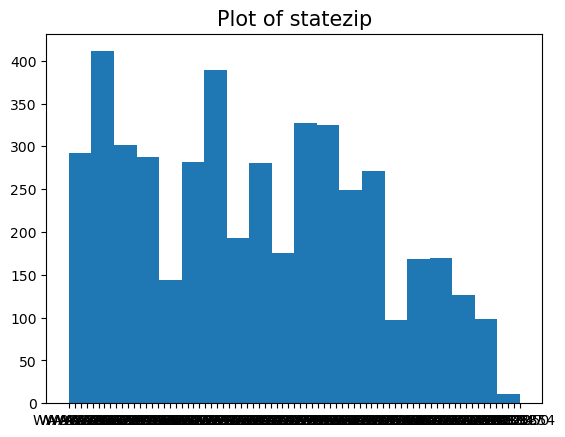

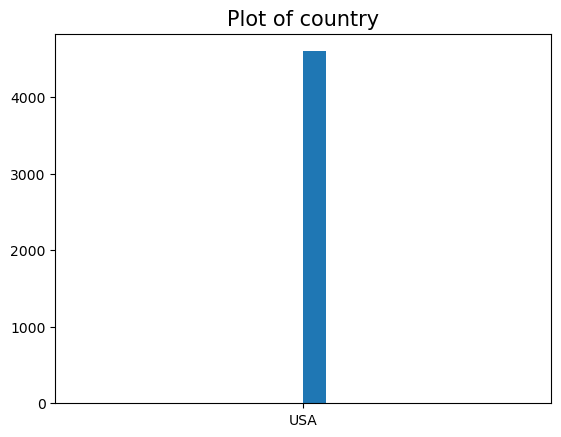

In [9]:
for c in housing.columns:
    plt.title("Plot of "+c,fontsize=15)
    plt.hist(housing[c],bins=20)
    plt.show()

In [10]:
housing.shape

(4600, 18)

In [12]:
len(housing.query('sqft_living >= 8000 or price >= 1000000' ))/len(housing)

0.075

In [13]:
len(housing.query('sqft_living < 8000 and price < 1000000 and price > 0'))/len(housing)

0.9145652173913044

In [36]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2,1.00,880,1.0,0,0,3,880,1938,False


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4207 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4207 non-null   float64
 1   bedrooms      4207 non-null   int64  
 2   bathrooms     4207 non-null   float64
 3   sqft_living   4207 non-null   int64  
 4   floors        4207 non-null   float64
 5   waterfront    4207 non-null   int64  
 6   view          4207 non-null   int64  
 7   condition     4207 non-null   int64  
 8   sqft_above    4207 non-null   int64  
 9   yr_built      4207 non-null   int64  
 10  has_basement  4207 non-null   bool   
dtypes: bool(1), float64(3), int64(7)
memory usage: 494.7 KB


In [15]:
housing.query('floors == 3.5').describe().T

,count,mean,std,min,25%,50%,75%,max
price,2.0,829250.00,375827.254201,563500.0,696375.000,829250.00,962125.000,1095000.0
bedrooms,2.0,1.50,2.121320,0.0,0.750,1.50,2.250,3.0
bathrooms,2.0,1.25,1.767767,0.0,0.625,1.25,1.875,2.5
sqft_living,2.0,2232.00,1176.625684,1400.0,1816.000,2232.00,2648.000,3064.0
sqft_lot,2.0,3038.00,2440.932609,1312.0,2175.000,3038.00,3901.000,4764.0
floors,2.0,3.50,0.000000,3.5,3.500,3.50,3.500,3.5
waterfront,2.0,0.00,0.000000,0.0,0.000,0.00,0.000,0.0
view,2.0,1.00,1.414214,0.0,0.500,1.00,1.500,2.0
condition,2.0,3.00,0.000000,3.0,3.000,3.00,3.000,3.0
sqft_above,2.0,2232.00,1176.625684,1400.0,1816.000,2232.00,2648.000,3064.0


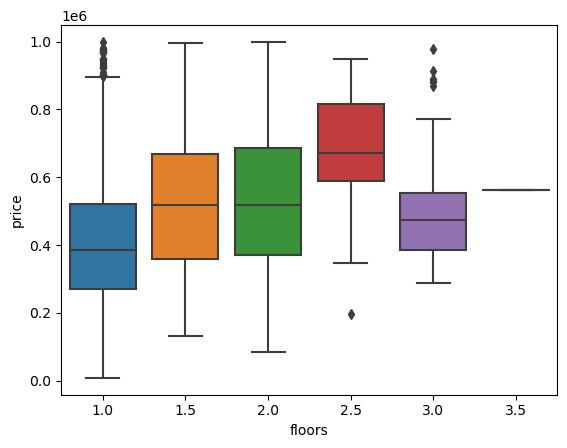

In [16]:
ax = sns.boxplot(data=housing.query('sqft_living < 8000 and price < 1000000 and price > 0'), x = 'floors',y = 'price')

In [17]:
housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')
housing.shape

(4207, 18)

In [18]:
#non-lambda
def nonlambda (variable): 
    return True if variable > 0 else False

housing['has_basement'] = housing['sqft_basement'].apply(
nonlambda
    )
housing.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,has_basement
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,True
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,True
5,5/2/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,False
6,5/2/2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,False
7,5/2/2014 0:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,False
8,5/2/2014 0:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,True
9,5/2/2014 0:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,False
10,5/2/2014 0:00,463000.0,3,1.75,1710,7320,1.0,0,0,3,1710,0,1948,1994,Burke-Gilman Trail,Lake Forest Park,WA 98155,USA,False


In [19]:
housing['has_basement'] = housing['sqft_basement'].apply(
    lambda x: True if x > 0 else False)
housing.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,has_basement
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,True
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,True
5,5/2/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,False
6,5/2/2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,False
7,5/2/2014 0:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,False
8,5/2/2014 0:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,True
9,5/2/2014 0:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,False
10,5/2/2014 0:00,463000.0,3,1.75,1710,7320,1.0,0,0,3,1710,0,1948,1994,Burke-Gilman Trail,Lake Forest Park,WA 98155,USA,False


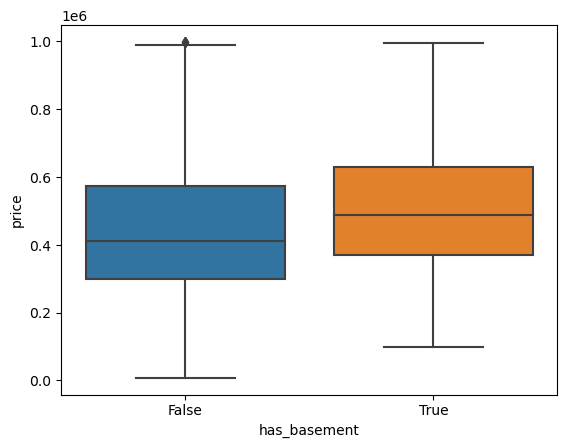

In [20]:
ax = sns.boxplot(data=housing.query('sqft_living < 8000 and price < 1000000 and price > 0'), x = 'has_basement',y = 'price')

<Axes: >

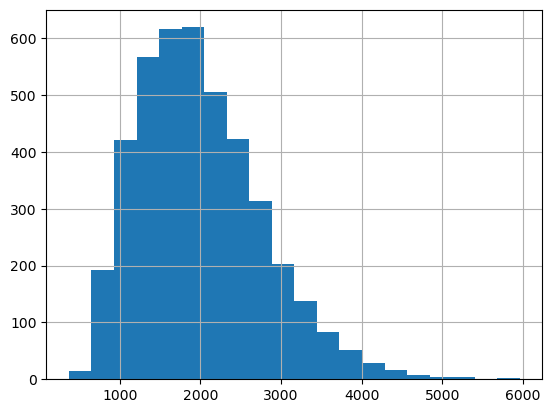

In [21]:
housing.sqft_living.hist(bins=20)

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4207 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4207 non-null   object 
 1   price          4207 non-null   float64
 2   bedrooms       4207 non-null   int64  
 3   bathrooms      4207 non-null   float64
 4   sqft_living    4207 non-null   int64  
 5   sqft_lot       4207 non-null   int64  
 6   floors         4207 non-null   float64
 7   waterfront     4207 non-null   int64  
 8   view           4207 non-null   int64  
 9   condition      4207 non-null   int64  
 10  sqft_above     4207 non-null   int64  
 11  sqft_basement  4207 non-null   int64  
 12  yr_built       4207 non-null   int64  
 13  yr_renovated   4207 non-null   int64  
 14  street         4207 non-null   object 
 15  city           4207 non-null   object 
 16  statezip       4207 non-null   object 
 17  country        4207 non-null   object 
 18  has_base

In [23]:
housing = housing.drop(columns=['date','street','city','statezip','country',
                                'sqft_lot','yr_renovated','sqft_basement'])

## The Housing dataset

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4207 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4207 non-null   float64
 1   bedrooms      4207 non-null   int64  
 2   bathrooms     4207 non-null   float64
 3   sqft_living   4207 non-null   int64  
 4   floors        4207 non-null   float64
 5   waterfront    4207 non-null   int64  
 6   view          4207 non-null   int64  
 7   condition     4207 non-null   int64  
 8   sqft_above    4207 non-null   int64  
 9   yr_built      4207 non-null   int64  
 10  has_basement  4207 non-null   bool   
dtypes: bool(1), float64(3), int64(7)
memory usage: 365.6 KB


In [25]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2,1.00,880,1.0,0,0,3,880,1938,False


## How to identify correlations with a scatterplot

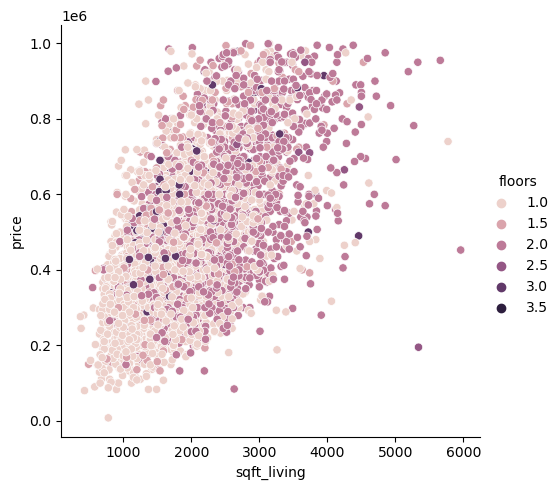

In [26]:
sns.relplot(data=housing, x='sqft_living', y='price', hue="floors")

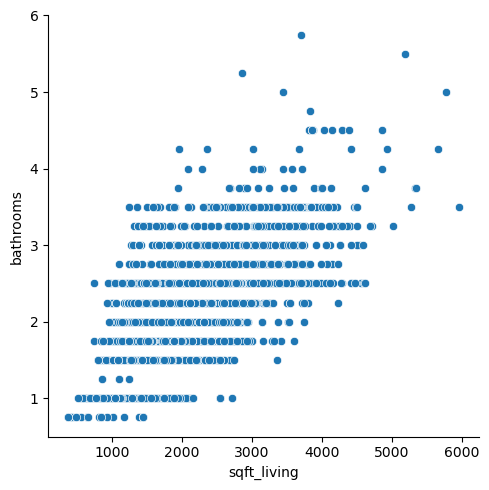

In [27]:
sns.relplot(data=housing, x='sqft_living', y='bathrooms')

## How to identify correlations with a grid of scatterplots

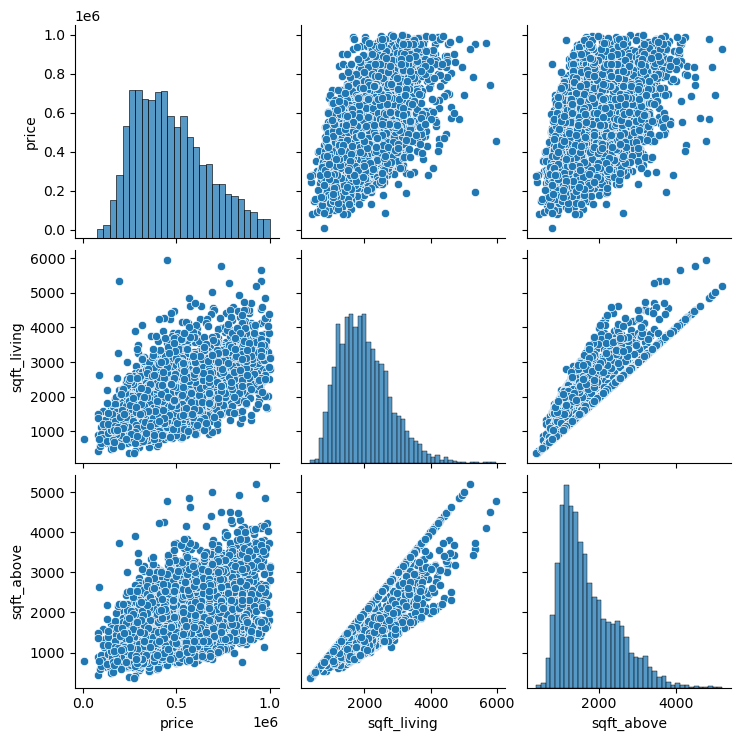

In [28]:
sns.pairplot(data=housing,
             y_vars=['price','sqft_living','sqft_above'], 
             x_vars=['price','sqft_living','sqft_above']
             #diag_kind='kde'
             )

## How to identify correlations with r-values

In [29]:
# r = coefficient of correlation

housing.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.000000,0.305046,0.460155,0.607379,0.272151,0.073671,0.196460,0.044926,0.517395,0.053012,0.152591
bedrooms,0.305046,1.000000,0.516726,0.603655,0.148377,-0.032263,0.060074,0.015105,0.466683,0.154287,0.157001
bathrooms,0.460155,0.516726,1.000000,0.715626,0.495380,0.020700,0.112797,-0.145555,0.637045,0.521801,0.127437
sqft_living,0.607379,0.603655,0.715626,1.000000,0.325647,0.030473,0.184432,-0.086310,0.848312,0.331001,0.175223
floors,0.272151,0.148377,0.495380,0.325647,1.000000,0.008710,-0.006647,-0.298350,0.526227,0.502039,-0.305249
waterfront,0.073671,-0.032263,0.020700,0.030473,0.008710,1.000000,0.321411,0.026089,0.020846,-0.037066,0.001688
view,0.196460,0.060074,0.112797,0.184432,-0.006647,0.321411,1.000000,0.041332,0.075312,-0.064988,0.152347
condition,0.044926,0.015105,-0.145555,-0.086310,-0.298350,0.026089,0.041332,1.000000,-0.209960,-0.394022,0.167838
sqft_above,0.517395,0.466683,0.637045,0.848312,0.526227,0.020846,0.075312,-0.209960,1.000000,0.456452,-0.294986
yr_built,0.053012,0.154287,0.521801,0.331001,0.502039,-0.037066,-0.064988,-0.394022,0.456452,1.000000,-0.198823


In [30]:
""" 
price	1.000000
sqft_living	0.607379
sqft_above	0.517395
bathrooms	0.460155
bedrooms	0.305046
floors	0.272151
view	0.196460
has_basement	0.152591
waterfront	0.073671
yr_built	0.053012
condition	0.044926
"""

' \nprice\t1.000000\nsqft_living\t0.607379\nsqft_above\t0.517395\nbathrooms\t0.460155\nbedrooms\t0.305046\nfloors\t0.272151\nview\t0.196460\nhas_basement\t0.152591\nwaterfront\t0.073671\nyr_built\t0.053012\ncondition\t0.044926\n'

In [31]:
abs(housing.corr()[['condition']]).sort_values(by='condition', ascending=False)

,condition
condition,1.000000
yr_built,0.394022
floors,0.298350
sqft_above,0.209960
has_basement,0.167838
bathrooms,0.145555
sqft_living,0.086310
price,0.044926
view,0.041332
waterfront,0.026089


In [32]:
housing.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.607379
sqft_above,0.517395
bathrooms,0.460155
bedrooms,0.305046
floors,0.272151
view,0.196460
has_basement,0.152591
waterfront,0.073671
yr_built,0.053012


## How to identify correlations with a heatmap

<Axes: >

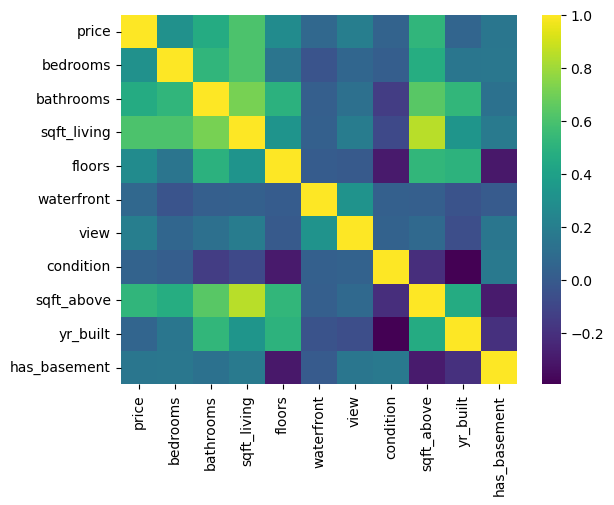

In [33]:
sns.heatmap(data=housing.corr(), cmap='viridis')

<Axes: >

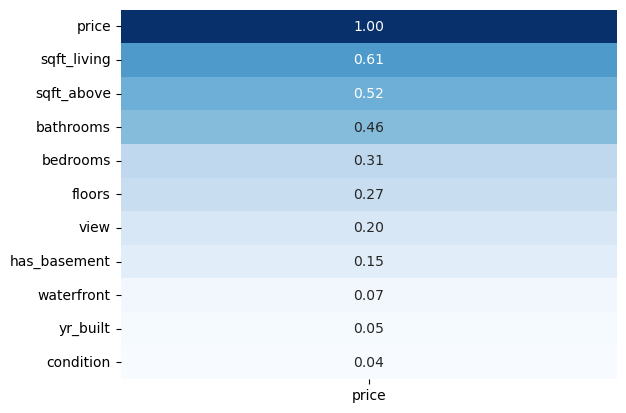

In [34]:
sns.heatmap(data=housing.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#r-squared = coeficient of determination
0.61**2

0.3721

In [ ]:
list(housing.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'yr_built',
 'has_basement']

In [ ]:
housing.price.quantile(0.95)

850000.0

In [ ]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [ ]:
housing.shape

(4207, 11)

In [ ]:
# ML CODE LINE 1: split the data
# x - features/influencer/predictors/dependent variables
# y - target/response/label/independent variables
housing_sample = housing.query("price < 1184050")
x_train, x_test, y_train, y_test = train_test_split(
    # Creating training features = "X"
    housing_sample[[
 'bedrooms',
 'bathrooms',
 'sqft_living'
 ,
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'yr_built',
 'has_basement'
]],
# creating  training target = Y
 housing_sample[['price']], 
# x_train, x_test, y_train, y_test = train_test_split(
#     housing_sample[[ 'sqft_living']], housing_sample[['price']], 
     test_size=0.33, random_state=1234)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2818, 10)
(1389, 10)
(2818, 1)
(1389, 1)


<AxesSubplot: ylabel='Density'>

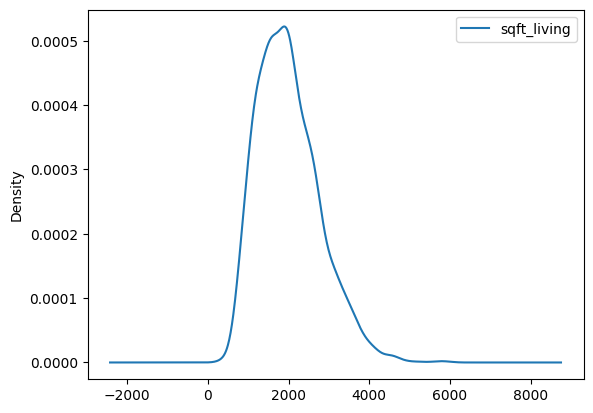

In [ ]:
x_train.plot.kde()

<AxesSubplot: ylabel='Density'>

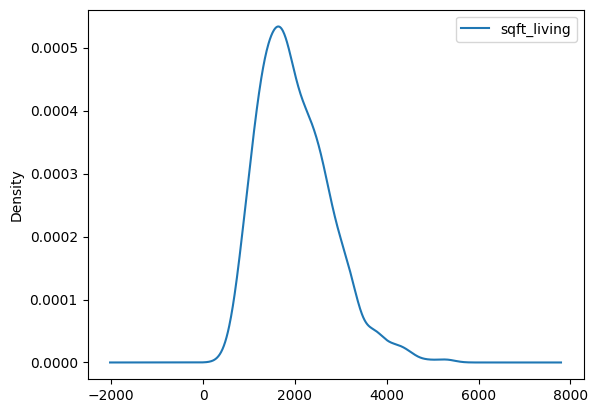

In [ ]:
x_test.plot.kde()

In [ ]:

# create the model from the training dataset
linearModel = LinearRegression() # ML CODE LINE 2:  create a  class of the type of the algorithm you'll use
linearModel.fit(x_train, y_train) # ML CODE LINE 3: creates a linear regression model

# 2 var - 0.06796236042762027
# 1 var - 0.06848429889803354
# all var - 0.07475527718481156

LinearRegression()

In [ ]:
y_pred =linearModel.predict(x_train) # ML CODE LINE 4: use the model to generate predictions 
# validate the model with the test dataset


In [ ]:
#ML CODE LINE 5: getting a metric for the performance of the model
from sklearn.metrics import r2_score
price_r2 = r2_score(y_train.to_numpy(), y_pred)
print("{} R squared is {}% different than predicted square on TRAINING DATA of R".format(round(price_r2,4),round(100 *(0.3721 - price_r2)/0.3721,2))) # comparing the sauare of the r (correlation) to our model's r-squared
# one variable 0.3693 R squared 

0.3693 R squared is 0.77% different than predicted square on TRAINING DATA of R


In [ ]:
#ML CODE LINE 4a: getting a metric for the performance of the model - test data
#ML CODE LINE 5a: getting a metric for the performance of the model - test data
y_pred_test =linearModel.predict(x_test)
price_r2_test = r2_score(y_test.to_numpy(), y_pred_test)
print("{} R squared is {}% different than predicted square on TEST DATA of R".format(round(price_r2_test,4),round(100 *(0.3721 - price_r2)/0.3721,2))) # comparing the sauare of the r (correlation) to our model's r-squared

0.3681 R squared is 0.77% different than predicted square on TEST DATA of R


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test.to_numpy(), y_pred_test)
# 33.48% MAPE

0.3348136896600145

In [ ]:
y_test

,price
2924,632500.0
1019,507500.0
419,536500.0
2077,540000.0
2467,250600.0
...,...
491,360000.0
2889,925000.0
1473,590000.0
1449,326000.0


In [ ]:
print(linearModel.coef_ )
print(linearModel.intercept_)

[[-24455.97570914  33417.36850301     91.95343869  64157.59604341
   73056.82020467  14361.5130314   21405.5527653      76.02865351
   -1871.75171356  67746.83444332]]
[3663410.57511447]


In [ ]:
(0.07475527718481156 - 0.06848429889803354)/0.06848429889803354

In [ ]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[475445.61348513],
       [442045.03279308],
       [584232.6841466 ],
       ...,
       [542991.43995449],
       [455759.56190832],
       [467447.53637819]])

In [ ]:
# y = mx + b or target = coefficient*input + intercept
print( "price = {0} * sqft_living+ {1}".format(str(linearModel.coef_[0][0]),str(linearModel.intercept_[0])))

price = 156.08006337157076 * sqft_living+ 162066.9462386825


In [ ]:
housing["price_linreg"] = 156.08006337157076  * housing["sqft_living"] + 162066.9462386825

In [ ]:
housing["price_predict"] = linearModel.predict(housing[['sqft_living']])

<AxesSubplot: xlabel='price_predict', ylabel='price_linreg'>

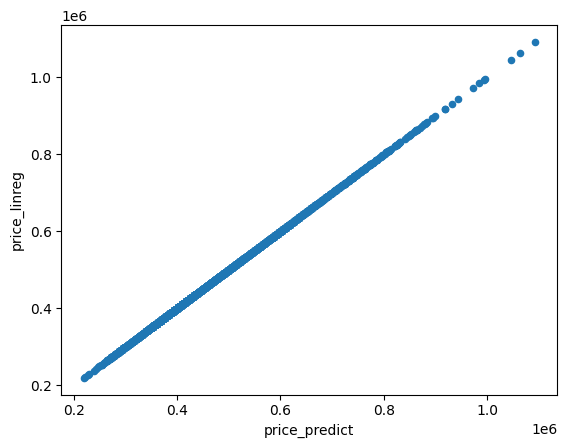

In [ ]:
housing.plot.scatter( x= 'price_predict', y = "price_linreg")

In [ ]:
housing.head(5)

In [ ]:
melted = pd.melt(housing, id_vars=['sqft_living'], 
                 value_vars=['price','price_predict'], 
                 var_name='price_type', value_name='price_value')
melted

,sqft_living,price_type,price_value
0,1340,price,313000.000000
1,1930,price,342000.000000
2,2000,price,420000.000000
3,1940,price,550000.000000
4,880,price,490000.000000
...,...,...,...
8409,1510,price_predict,397747.841930
8410,1460,price_predict,389943.838761
8411,3010,price_predict,631867.936987
8412,2090,price_predict,488274.278685


## How to plot the predicted data

In [ ]:
x_test.reset_index(drop=True)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,4,2.50,2090,2.0,0,0,3,2090,1986,False
1,3,2.00,2020,1.0,0,0,3,1020,1963,True
2,4,1.75,2000,1.5,0,0,5,1450,1926,True
3,4,2.50,1780,2.0,0,0,3,1780,1994,False
4,4,2.50,1930,1.0,0,0,3,1120,1981,True
...,...,...,...,...,...,...,...,...,...,...
1384,4,2.00,1730,1.0,0,0,5,1010,1943,True
1385,4,2.50,3280,2.0,0,0,3,3280,1994,False
1386,3,2.00,1650,2.0,0,0,4,1650,1926,False
1387,3,2.75,1720,1.0,0,0,4,1720,1958,False


In [ ]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['sqft_living'], 
                 value_vars=['price','price_predicted'], 
                 var_name='price_type', value_name='price_value')

melted.head()

,sqft_living,price_type,price_value
0,2090,price,632500.0
1,2020,price,507500.0
2,2000,price,536500.0
3,1780,price,540000.0
4,1930,price,250600.0


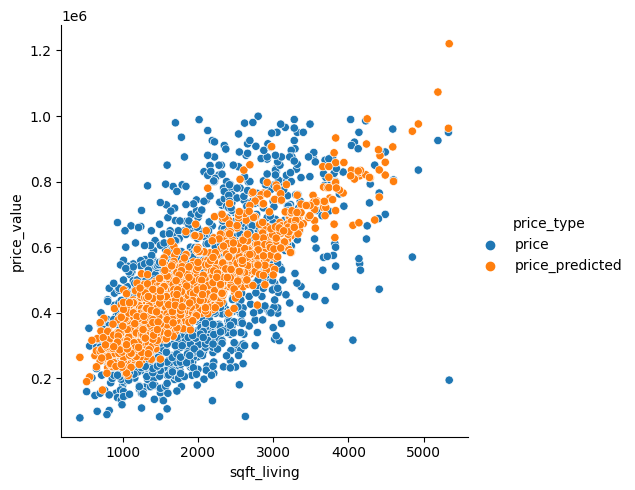

In [ ]:
sns.relplot(data=melted, x='sqft_living', y='price_value', 
            hue='price_type')

## How to plot the residuals

In [ ]:
combined['residual'] = combined.price - combined.price_predicted
combined.head()

,price_predicted,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement,price,residual
0,475445.613485,4,2.50,2090,2.0,0,0,3,2090,1986,False,632500.0,157054.386515
1,442045.032793,3,2.00,2020,1.0,0,0,3,1020,1963,True,507500.0,65454.967207
2,584232.684147,4,1.75,2000,1.5,0,0,5,1450,1926,True,536500.0,-47732.684147
3,408397.151195,4,2.50,1780,2.0,0,0,3,1780,1994,False,540000.0,131602.848805
4,399933.266360,4,2.50,1930,1.0,0,0,3,1120,1981,True,250600.0,-149333.266360


In [ ]:
combined['abs_pct_err'] =  abs(combined.residual / combined.price_predicted)

In [ ]:
combined.abs_pct_err.describe()

count    1389.000000
mean        0.251324
std         0.184910
min         0.000486
25%         0.112606
50%         0.219145
75%         0.352449
max         1.386234
Name: abs_pct_err, dtype: float64

In [ ]:
combined.residual.max()

546523.2706787647

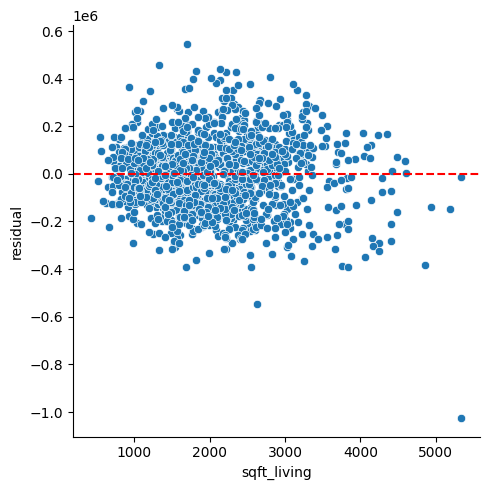

In [ ]:
g = sns.relplot(data=combined, x='sqft_living', y='residual')

# draw a horizontal line where the Y axis is 0
for ax in g.axes.flat:    
    ax.axhline(0, ls='--',color = "red")

<AxesSubplot: ylabel='Frequency'>

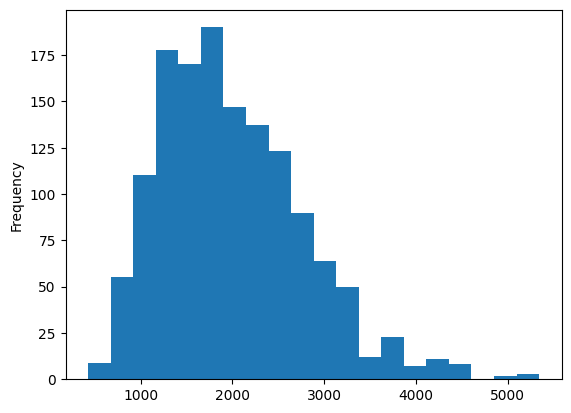

In [ ]:
combined.sqft_living.plot.hist(bins=20)

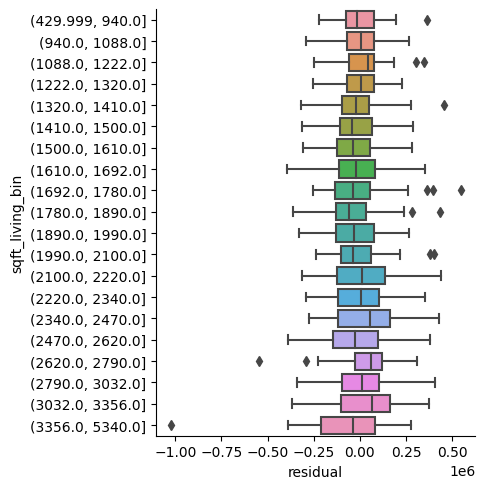

In [ ]:
combined["sqft_living_bin"] = pd.qcut(combined.sqft_living, q=20)
sns.catplot(data = combined , kind='box', y="sqft_living_bin",x="residual" , orient='h')

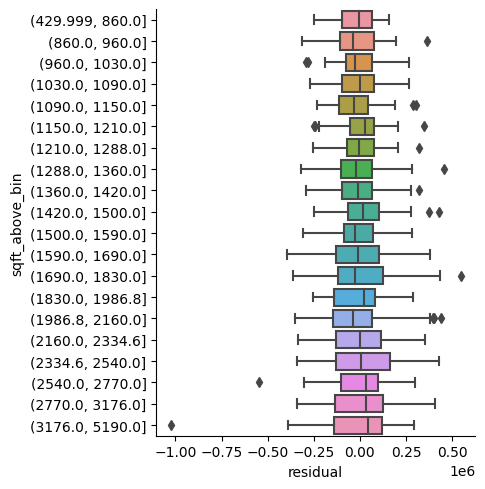

In [ ]:
combined["sqft_above_bin"] = pd.qcut(combined.sqft_above, q=20)
sns.catplot(data = combined , kind='box', y="sqft_above_bin",x="residual" , orient='h')

## How to plot a linear regression

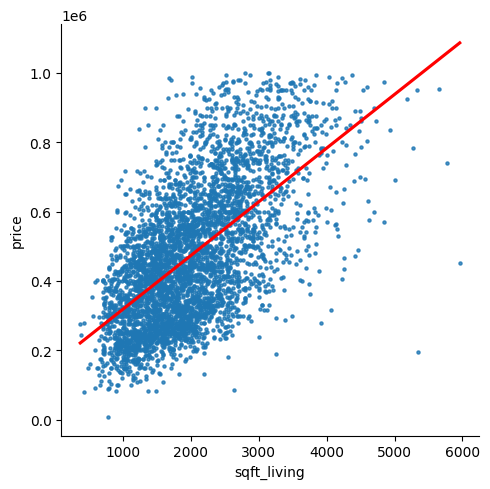

In [ ]:
sns.lmplot(data=housing, x='sqft_living', y='price', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'red'})

In [ ]:
!pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## How to plot a logistic regression

<AxesSubplot: >

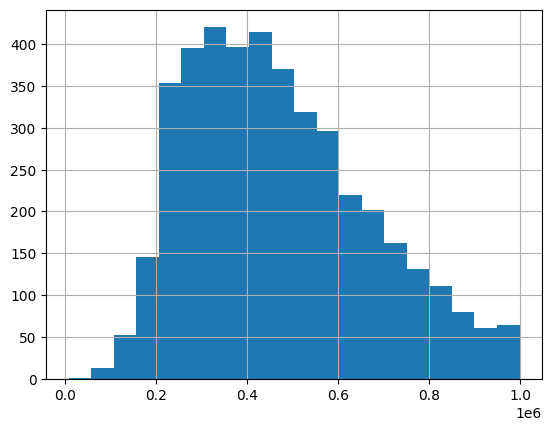

In [ ]:
housing.price.hist(bins=20)

In [ ]:
mort_dist = housing[['price']].quantile([i/20 for i in range(0,20)])
mort_dist

mort_dist["quantile"] = mort_dist.index
mort_dist

,price,quantile
0.00,7800.00000,0.00
0.05,206000.00000,0.05
0.10,240000.00000,0.10
0.15,265000.00000,0.15
0.20,292348.57144,0.20
0.25,315137.50000,0.25
0.30,340000.00000,0.30
0.35,367500.00000,0.35
0.40,395000.00000,0.40
0.45,417995.71429,0.45


<AxesSubplot: xlabel='price'>

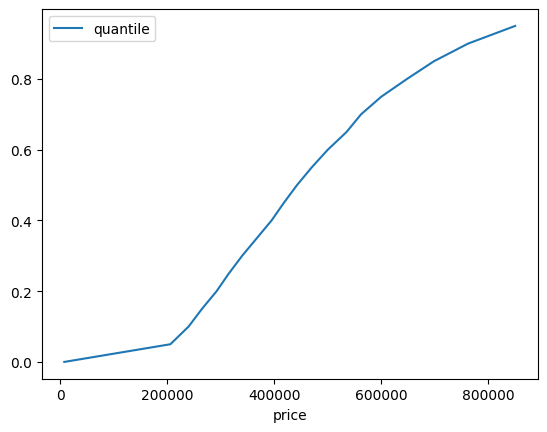

In [ ]:
mort_dist.plot.line(x="price",y="quantile")

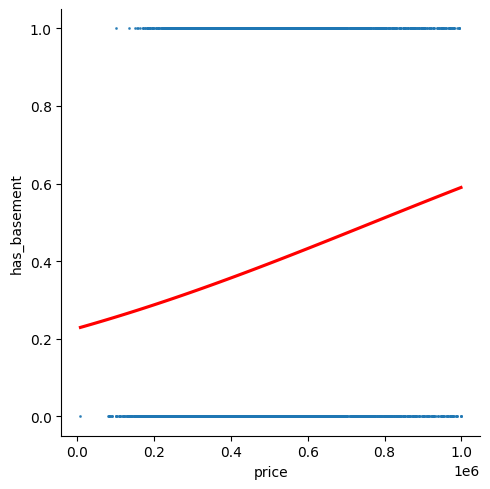

In [ ]:
sns.lmplot(data=housing, x='price', y='has_basement', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'red'}, 
           logistic=True)

## How to plot a polynormal regression

In [ ]:
# get the data
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1901,01-04 Years,1695.0
2,1902,01-04 Years,1655.7
3,1903,01-04 Years,1542.1
4,1904,01-04 Years,1591.5


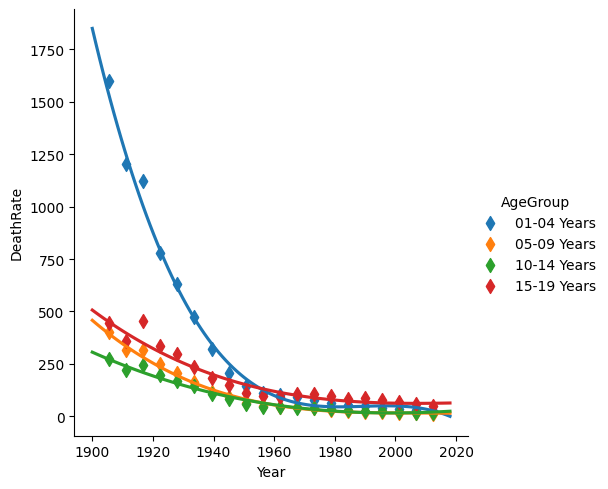

In [ ]:
sns.lmplot(x='Year', y='DeathRate', hue='AgeGroup', data=mortality_data, ci=None,
           markers='d', x_bins=20, order=3)

## How to plot a lowess regression

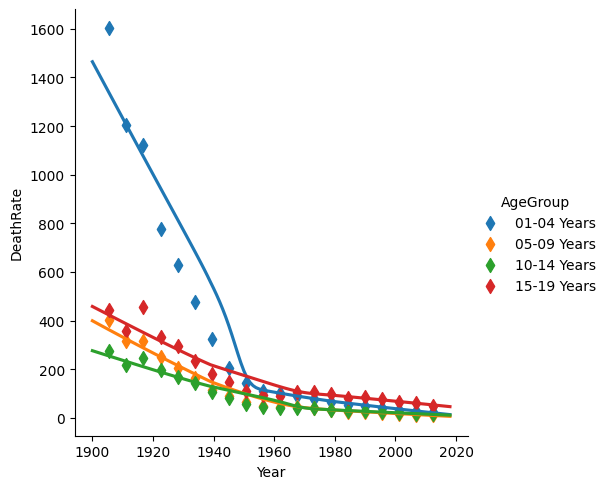

In [ ]:
sns.lmplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup', 
           ci=None, markers='d', x_bins=20, lowess=True)

## How to plot residuals with Seaborn

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

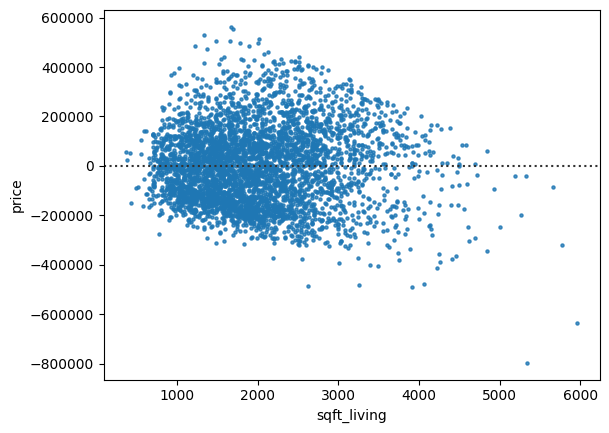

In [ ]:
sns.residplot(data=housing, x='sqft_living', y='price', 
              scatter_kws={'s':5})

<AxesSubplot: xlabel='Year', ylabel='DeathRate'>

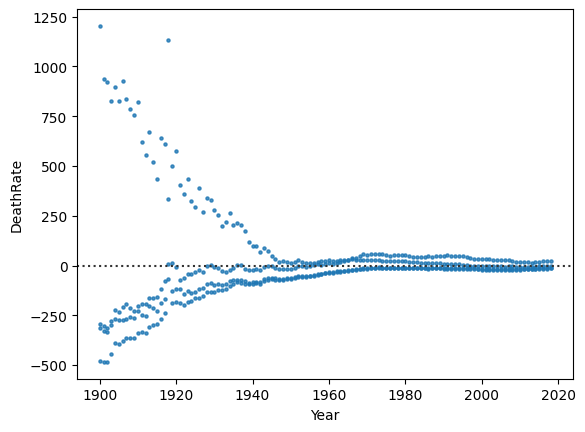

In [ ]:
sns.residplot(data=mortality_data, x='Year', y='DeathRate', 
              order=3, scatter_kws={'s':5})